### Notebook 3: Naive Bayes

### Libraries used for all notebooks 

In [14]:
# Import libaries
import requests
from bs4 import BeautifulSoup
import pandas as pd
from scrapy.selector import Selector
from scrapy.http import HtmlResponse
import re
import time
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

### Importing CSV files
Previously exported CSV files in Notebook 1 are imported in to perform cleaning

In [15]:
#importing CSV files 
rships = pd.read_csv("../datasets/rships.csv", index_col = 'Unnamed: 0')
jnm = pd.read_csv("../datasets/jnm.csv", index_col = 'Unnamed: 0')

In [16]:
#renaming text column to posts
rships.columns = ['posts']
jnm.columns = ['posts']

In [17]:
#creating new columns denoting what subreddit 
rships['subreddit'] = 0
jnm['subreddit'] = 1

Text(0.5, 1.0, 'Histogram of distribution of posts from r/justnomil')

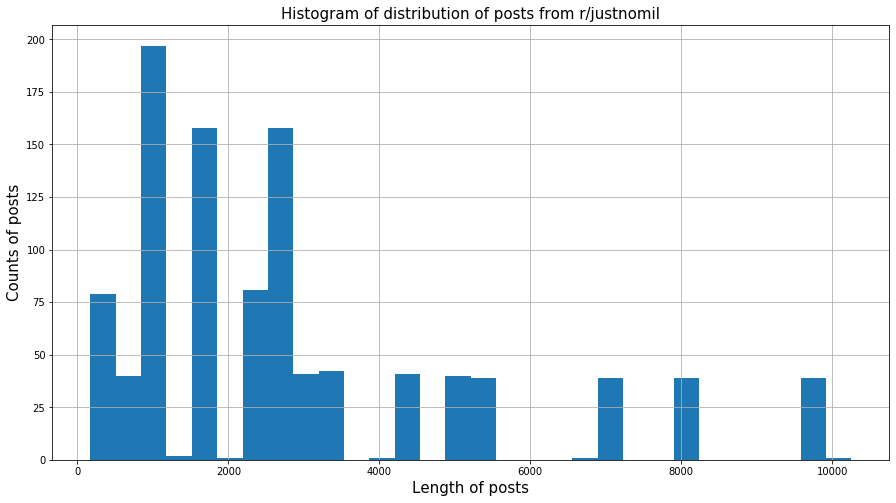

In [18]:
plt.figure(figsize = (15,8))
plt.grid()
plt.hist([len(x) for x in jnm['posts']], bins = 30)
plt.ylabel('Counts of posts', size=15)
plt.xlabel('Length of posts', size=15)
plt.title('Histogram of distribution of posts from r/justnomil', size = 15)

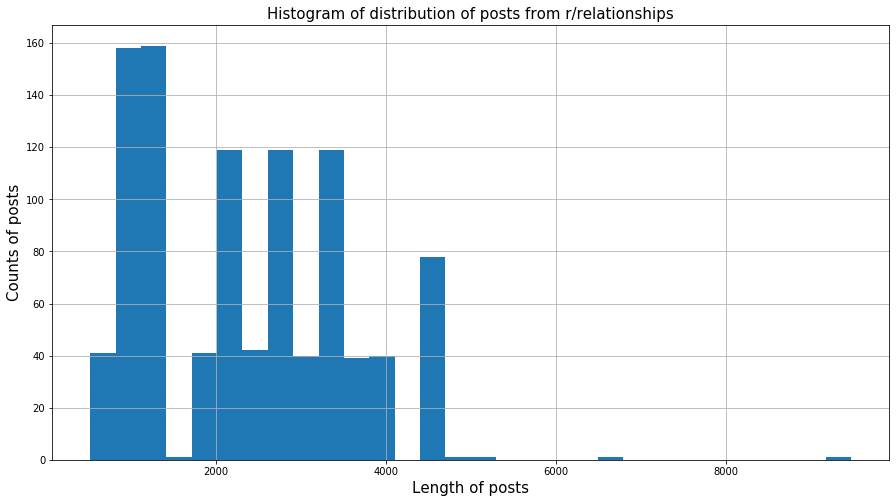

In [19]:
plt.figure(figsize = (15,8))
plt.hist([len(x) for x in rships['posts']], bins = 30)
plt.ylabel('Counts of posts', size=15)
plt.xlabel('Length of posts', size=15)
plt.title('Histogram of distribution of posts from r/relationships', size = 15)
plt.grid()

In [20]:
#finding out how many posts were taken from each subreddit
print(len(rships), len(jnm))

1000 1039


In [21]:
#visual inspection of the data
jnm.head()

,posts,subreddit
0,"Does your MIL suck, but you don't feel like ma...",1
1,MIL has shown her ass to majority of our weddi...,1
2,(TW: Ignorant homophobic tendencies and clearl...,1
3,"Sorry for the typos, trying to post before my ...",1
4,Tw: talk of medical conditions and hospitals\n...,1


In [22]:
rships.head()

,posts,subreddit
0,Tl;dr: New friends at school talking shit abou...,0
1,I was raised by my single mom and I always tho...,0
2,"To begin, my husband and I have been together ...",0
3,"\nI'm very much a hobby baker, I’m still learn...",0
4,I love my girlfriend. We've only been dating f...,0


In [23]:
#checking if anything were duplicate entries
print(len(rships.duplicated(keep='first')))
print(len(jnm.duplicated(keep='first')))

1000
1039


In [24]:
# appending the dataframes together
combined = rships.append(jnm)

In [25]:
#reseting the index to prevent duplicated index numbers
combined = combined.reset_index(drop = True)

In [26]:
combined.tail()

,posts,subreddit
2034,"This weekend was my gf (F, 31) and my (F,24) 5...",1
2035,I just had my third child (second with DH) abo...,1
2036,Old story so no advice wanted for this specifi...,1
2037,I have made this into bullet points so I can c...,1
2038,"I am transgender, female to male, I've been ou...",1


In [27]:
combined.shape

(2039, 2)

### Cleaning of text into clean text without punctuations and stopwords

In [28]:
stopwords = stopwords.words('english')

In [29]:
def clean(text):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    
    # 1. Remove HTML.
    new_text = BeautifulSoup(text).get_text()
    
    # 2. Remove non-letters.
    no_links = re.sub("\(https\S+\)", " ", new_text)
    letters_only = re.sub("[^a-zA-Z]", " ", no_links)
    
    # 3. Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    # Notice that we did this in one line!
    
    # 4. Initiate Porterstemmer and stem
    p_s = PorterStemmer()
    stemmed = [p_s.stem(x) for x in words]
    
    # 5. In Python, searching a set is much faster than searching
    # a list, so convert the stop words to a set.
    stops = set(stopwords)
    
    # 6. Remove stop words.
    meaningful_words = [w for w in stemmed if not w in stopwords]
    
    # 7. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))

In [30]:
combined['posts'][981]

"Original post [here](https://old.reddit.com/r/relationships/comments/d9xc55/i_24f_have_a_crush_on_a_guy_29m_at_my_grad_school/).\n\nThanks for all your advice (except for everyone who gave me abuse or told me to just fuck the guy I had a crush on)! I was worried the crush would stay, most people in the comments said it would go away, and I guess you were right.\n\nI talked to my fiancé about it and when we were talking we realized I've been staying at school to study every evening and haven't been making much time for him. I leave school before 6pm now so I get home when he does after he's been to work and we're spending quality time together every day, which is making us closer and helping me remember all the great things that our relationship has.\n\nI also talked to Will (a lot of you suggested that if I got to know him the crush would go away). I didn't tell him about the crush. I just made a friend. We're...very different. It would never work. I basically had 3 conversations with

In [31]:
combined['posts'] = [clean(x) for x in combined['posts']]

In [32]:
combined['posts'][981]

'origin post thank advic except everyon gave abus told fuck guy crush wa worri crush would stay peopl comment said would go away guess right talk fianc talk realiz stay school studi everi even make much time leav school befor pm get home doe work spend qualiti time togeth everi day make us closer help rememb great thing relationship ha also talk lot suggest got know crush would go away tell crush made friend veri differ would never work basic convers crush die fun gaze even togeth singl turn engag well go figur feel anymor tl dr chri'

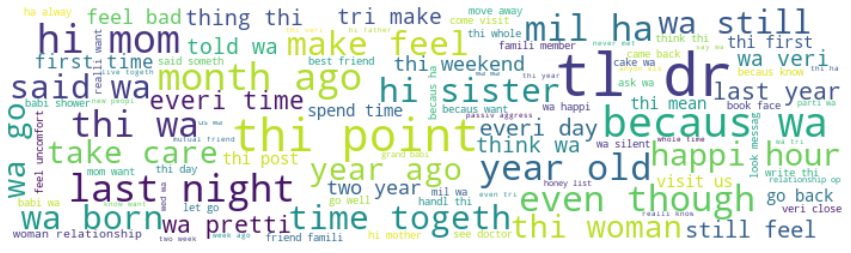

In [33]:
text = " ".join(e for e in combined['posts'])

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", width=700).generate(text)
# Save image file 
wordcloud.to_file("./bag_of_words.png")

# Display the generated image:
plt.figure(figsize = (15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [34]:
# making train test split of data
X_train, X_test, y_train, y_test = train_test_split(combined[['posts']],
                                                    combined['subreddit'],
                                                    random_state = 42)

### Vectorizing the posts to the top 2000 words

The posts were broken down into their words and the top 2000 words were chosen from the posts. 
Two specifications were tried: 

1) CountVectorizer /1 word

2) CountVectorizer /1 or 2 words 

In [53]:
cvec1 = CountVectorizer(max_features=2000)

In [54]:
cvec2 = CountVectorizer(max_features=2000, ngram_range=(1,2))

In [55]:
X_train_cvec1 = pd.DataFrame(cvec1.fit_transform(X_train['posts']).toarray(), columns = cvec1.get_feature_names()) #fit the X_train data
X_train_cvec2 = pd.DataFrame(cvec2.fit_transform(X_train['posts']).toarray(), columns = cvec2.get_feature_names())

In [56]:
cvec1_col = cvec1.get_feature_names()
cvec2_col = cvec2.get_feature_names()

In [57]:
print(X_train_cvec1.shape)
print(X_train_cvec2.shape)

(1529, 2000)
(1529, 2000)


In [58]:
X_test_cvec1 = pd.DataFrame(cvec1.transform(X_test['posts']).toarray(), columns = cvec1.get_feature_names()) #fit the X_train data
X_test_cvec2 = pd.DataFrame(cvec2.transform(X_test['posts']).toarray(), columns = cvec2.get_feature_names())

In [59]:
def check(word, list):
    if word in list:
        print("The word is in the list!")
    else:
        print("The word is not in the list!")

check('posts', list(cvec1_col))

The word is in the list!


In [60]:
X_train_cvec1['posts']

0       0
1       0
2       0
3       0
4       0
       ..
1524    0
1525    0
1526    0
1527    0
1528    0
Name: posts, Length: 1529, dtype: int64

In [61]:
cvec2_col

['000',
 '10',
 '100',
 '11g',
 '12',
 '15',
 '15 year',
 '17',
 '20',
 '30',
 '31',
 '45',
 '45 minut',
 '50',
 '8x10',
 'abl',
 'about',
 'abov',
 'absolut',
 'abu',
 'academ',
 'academ posit',
 'accept',
 'access',
 'accid',
 'account',
 'across',
 'act',
 'action',
 'actual',
 'admit',
 'admit say',
 'adult',
 'advantag',
 'advic',
 'advice',
 'affect',
 'afford',
 'afraid',
 'after',
 'again',
 'again thi',
 'aggress',
 'ago',
 'ago husband',
 'ago still',
 'agr',
 'air',
 'air bnb',
 'alarm',
 'all',
 'allow',
 'almost',
 'almost everi',
 'alon',
 'alone',
 'along',
 'alreadi',
 'alreadi agr',
 'also',
 'although',
 'alway',
 'alway felt',
 'alway told',
 'amaz',
 'amount',
 'and',
 'angry',
 'ani',
 'ani time',
 'anniversary',
 'announc',
 'annoy',
 'anoth',
 'answer',
 'antsi',
 'anxieti',
 'anymor',
 'anymore',
 'anyon',
 'anyon else',
 'anyon would',
 'anyth',
 'anyth neg',
 'anything',
 'anyway',
 'anyway he',
 'anyway thi',
 'anyways',
 'anywh',
 'apart',
 'apartment',
 'ap

In [62]:
lr1 = LogisticRegression()

In [63]:
model = lr1.fit(X_train_cvec1, y_train)

/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [66]:
score1 = lr1.score(X_test_cvec1, y_test)

In [67]:
score1

0.996078431372549

In [68]:
lr2 = LogisticRegression()

In [69]:
model = lr2.fit(X_train_cvec2, y_train)
score2 = lr1.score(X_test_cvec2, y_test)

/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [70]:
score2

0.4666666666666667

In [71]:
print(list(lr1.coef_))

[array([-0.02637205, -0.07651809, -0.00758857, ...,  0.00137875,
        0.00430784, -0.00093705])]


In [72]:
colcoef = pd.DataFrame()
colcoef['variables'] = X_train_cvec1.columns
colcoef['coef'] = lr1.coef_

ValueError: Length of values does not match length of index

In [ ]:
!pip install tensorflow